In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from pyti.relative_strength_index import relative_strength_index as rsi
from pyti.exponential_moving_average import exponential_moving_average as ema


2024-12-08 00:28:11.172230: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-08 00:28:11.200104: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-08 00:28:11.275520: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733635691.338506   39344 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733635691.357267   39344 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-08 00:28:11.440970: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
START = "2023-09-01"
END = "2024-09-01"
ticker = "QQQ"

# spy = yf.Ticker("SPY")

stock_df = yf.download(ticker, start=START, end=END)
stock_df = stock_df.xs(ticker, level='Ticker', axis=1)


stock_df['time_published'] = stock_df.index
stock_df['time_published'] = pd.to_datetime(stock_df['time_published'])
stock_df['time_published'] = stock_df['time_published'].dt.date
display(stock_df)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume,time_published
Date,,,,,,,
2023-09-01,374.475800,377.589996,380.829987,376.079987,380.399994,39772400,2023-09-01
2023-09-05,374.951904,378.070007,379.309998,375.829987,376.769989,32344200,2023-09-05
2023-09-06,371.649384,374.739990,377.630005,372.700012,377.279999,42998700,2023-09-06
2023-09-07,368.991486,372.059998,372.850006,369.149994,370.209991,52060700,2023-09-07
2023-09-08,369.507172,372.579987,374.850006,371.600006,372.010010,35800100,2023-09-08
...,...,...,...,...,...,...,...
2024-08-26,474.672974,475.339996,480.380005,473.239990,479.450012,27452600,2024-08-26
2024-08-27,476.090973,476.760010,477.839996,471.709991,473.690002,27510000,2024-08-27
2024-08-28,470.688568,471.350006,477.019989,467.890015,476.290009,37372400,2024-08-28


In [3]:
#Adding indicators
stock_df['RSI'] = rsi(stock_df['Close'].tolist(), 15)  # 15 is the period length
stock_df['EMAF'] = ema(stock_df['Close'].tolist(), 20)  # EMA with period 20
stock_df['EMAM'] = ema(stock_df['Close'].tolist(), 100)  # EMA with period 100
stock_df['EMAS'] = ema(stock_df['Close'].tolist(), 150)  # EMA with period 150

stock_df['Target'] = stock_df['Adj Close']-stock_df.Open
stock_df['Target'] = stock_df['Target'].shift(-1)

stock_df['TargetClass'] = [1 if stock_df.Target[i]>0 else 0 for i in range(len(stock_df))]

stock_df['TargetNextClose'] = stock_df['Adj Close'].shift(-1)

stock_df.dropna(inplace=True)
stock_df.reset_index(inplace = True)
stock_df.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)

# stock_df_set = stock_df.iloc[:, 0:11]#.values
# pd.set_option('display.max_columns', None)
display(stock_df)

/tmp/ipykernel_39344/3608505737.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stock_df['TargetClass'] = [1 if stock_df.Target[i]>0 else 0 for i in range(len(stock_df))]


Price,Adj Close,High,Low,Open,time_published,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose
0,439.283508,442.500000,439.200012,441.410004,2024-04-08,51.596042,441.506979,428.700458,416.465736,-2.051361,0,440.908630
1,440.908630,443.239990,437.440002,442.959991,2024-04-09,53.439772,441.647847,429.169875,416.940984,0.060181,1,437.060181
2,437.060181,439.239990,436.279999,437.000000,2024-04-10,48.730233,441.256967,429.516433,417.349815,3.779236,1,444.039246
3,444.039246,446.329987,437.959991,440.260010,2024-04-11,56.225795,441.724858,430.015538,417.867360,-4.139557,0,436.960449
4,436.960449,442.239990,436.880005,441.100006,2024-04-12,48.517395,441.382879,430.341138,418.274847,-12.287994,0,429.772003
...,...,...,...,...,...,...,...,...,...,...,...,...
96,479.326416,482.739990,475.279999,479.239990,2024-08-23,57.185290,467.712632,465.507528,459.715826,-4.777039,0,474.672974
97,474.672974,480.380005,473.239990,479.450012,2024-08-26,53.957365,468.609249,465.805245,460.033902,2.400970,1,476.090973
98,476.090973,477.839996,471.709991,473.690002,2024-08-27,54.790543,469.671610,466.150536,460.365890,-5.601440,0,470.688568
99,470.688568,477.019989,467.890015,476.290009,2024-08-28,51.021758,469.835623,466.349197,460.605739,-3.280457,0,469.999542


In [4]:
news_df = pd.read_csv('models/technology_news_data_50Daily.csv')
news_df['time_published'] = pd.to_datetime(news_df['time_published'])
news_df['time_published'] = news_df['time_published'].dt.date
news_df = news_df[news_df['title'] != 'Before you continue']


df1 = stock_df.copy(deep=True)
df2 = news_df[['time_published', 'source', 'overall_sentiment_score']]
average_sentiment_df = df2.groupby(['time_published', 'source'], as_index=False)['overall_sentiment_score'].mean()
average_sentiment_df.rename(columns={'overall_sentiment_score': 'average sentiment score'}, inplace=True)
pivot_df = average_sentiment_df.pivot(index='time_published', columns='source', values='average sentiment score')
pivot_df.reset_index(inplace=True)
pivot_df.fillna(-1, inplace=True)
pivot_df.replace(-1, np.nan, inplace=True)
combined_df = pd.merge(df1, pivot_df, on='time_published', how='inner')
# # combined_df['time_published'] = pd.to_datetime(combined_df['time_published'])
# # combined_df['time_published'] = (combined_df['time_published'] - pd.to_datetime('1970-01-01')).dt.days
# df_encoded = pd.get_dummies(combined_df, columns=['source'])
# display(df_encoded)
display(combined_df)

,Adj Close,High,Low,Open,time_published,RSI,EMAF,EMAM,EMAS,Target,...,StockMarket.com,Stocknews.com,The Atlantic,The Economist,The Financial Express,The Street,The Week News,UPI Business,Wall Street Journal,Zacks Commentary
0,439.283508,442.500000,439.200012,441.410004,2024-04-08,51.596042,441.506979,428.700458,416.465736,-2.051361,...,NaN,NaN,-0.033848,NaN,NaN,NaN,NaN,NaN,NaN,0.209103
1,440.908630,443.239990,437.440002,442.959991,2024-04-09,53.439772,441.647847,429.169875,416.940984,0.060181,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.193731
2,437.060181,439.239990,436.279999,437.000000,2024-04-10,48.730233,441.256967,429.516433,417.349815,3.779236,...,NaN,NaN,0.241548,NaN,0.173894,NaN,NaN,NaN,NaN,0.163428
3,444.039246,446.329987,437.959991,440.260010,2024-04-11,56.225795,441.724858,430.015538,417.867360,-4.139557,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200163
4,436.960449,442.239990,436.880005,441.100006,2024-04-12,48.517395,441.382879,430.341138,418.274847,-12.287994,...,NaN,NaN,NaN,NaN,0.259303,NaN,NaN,NaN,NaN,0.163071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,479.326416,482.739990,475.279999,479.239990,2024-08-23,57.185290,467.712632,465.507528,459.715826,-4.777039,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.248688
97,474.672974,480.380005,473.239990,479.450012,2024-08-26,53.957365,468.609249,465.805245,460.033902,2.400970,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.169621
98,476.090973,477.839996,471.709991,473.690002,2024-08-27,54.790543,469.671610,466.150536,460.365890,-5.601440,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.176734
99,470.688568,477.019989,467.890015,476.290009,2024-08-28,51.021758,469.835623,466.349197,460.605739,-3.280457,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.170518


In [5]:
# List of columns representing sentiment scores
news_sentiment_columns = [
    'Al Jareeza', 'Associated Press', 'Barrons', 'Benzinga', 'Business Insider',
    'Business Standard', 'CNBC', 'CNN', 'Canada Newswire', 'Cointelegraph',
    'Decrypt.co', 'Financial News London', 'Financial Times', 'Forbes',
    'Fox Business News', 'GlobeNewswire', 'Investing News Network',
    'Investor Ideas', 'Investors Business Daily', 'Kiplinger', 'MarketWatch',
    'Money Control', 'Money Morning', 'Motley Fool', 'New York Times',
    'PR Newswire', 'PennyStocks.com', 'Reuters', 'South China Morning Post',
    'StockMarket.com', 'Stocknews.com', 'The Atlantic', 'The Economist',
    'The Financial Express', 'The Street', 'The Week News', 'UPI Business',
    'Wall Street Journal', 'Zacks Commentary'
]

# Initialize default weights (1.0) for each source
source_weights = {source: 1.0 for source in news_sentiment_columns}

# Step 1: Calculate price movement
combined_df['price_change'] = combined_df['Adj Close'].pct_change()  # Percentage change
combined_df['price_movement'] = combined_df['price_change'].apply(lambda x: 'up' if x > 0 else 'down')

# Step 2: Adjust weights based on price movement
def adjust_weights(row):
    price_movement = row['price_movement']
    
    # Adjust the weight for each source
    for source in news_sentiment_columns:
        if price_movement == 'up':
            source_weights[source] += 0.1  # Increase weight when price goes up
        elif price_movement == 'down':
            source_weights[source] -= 0.05  # Decrease weight when price goes down

    return source_weights

combined_df['adjusted_weights'] = combined_df.apply(adjust_weights, axis=1)

# Step 3: Apply the adjusted weights to the sentiment values
weighted_sentiments = combined_df[news_sentiment_columns].copy()
for idx, source in enumerate(news_sentiment_columns):
    weighted_sentiments[source] = combined_df.apply(lambda row: row[source] * row['adjusted_weights'][source], axis=1)

# Step 4: Calculate aggregate weighted sentiment
combined_df['aggregate_weighted_sentiment'] = weighted_sentiments.mean(axis=1)

# Use aggregate weighted sentiment in the model
final_df = combined_df[['Adj Close', 'High', 'Low', 'Open', 'aggregate_weighted_sentiment', 'Target', 'TargetClass', 'TargetNextClose']]


time_published = combined_df['time_published'].values
# final_df = combined_df[['Adj Close', 'High', 'Low', 'Open', 'Target', 'TargetClass', 'TargetNextClose']]


data_set = final_df.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

display(final_df)

,Adj Close,High,Low,Open,aggregate_weighted_sentiment,Target,TargetClass,TargetNextClose
0,439.283508,442.500000,439.200012,441.410004,0.726850,-2.051361,0,440.908630
1,440.908630,443.239990,437.440002,442.959991,0.722967,0.060181,1,437.060181
2,437.060181,439.239990,436.279999,437.000000,0.730712,3.779236,1,444.039246
3,444.039246,446.329987,437.959991,440.260010,0.527514,-4.139557,0,436.960449
4,436.960449,442.239990,436.880005,441.100006,0.801362,-12.287994,0,429.772003
...,...,...,...,...,...,...,...,...
96,479.326416,482.739990,475.279999,479.239990,0.851320,-4.777039,0,474.672974
97,474.672974,480.380005,473.239990,479.450012,0.698377,2.400970,1,476.090973
98,476.090973,477.839996,471.709991,473.690002,0.779870,-5.601440,0,470.688568
99,470.688568,477.019989,467.890015,476.290009,0.691314,-3.280457,0,469.999542


In [6]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from pyti.relative_strength_index import relative_strength_index as rsi
from pyti.exponential_moving_average import exponential_moving_average as ema


In [7]:
START = "2023-09-01"
END = "2024-09-01"
ticker = "QQQ"

# spy = yf.Ticker("SPY")

stock_df = yf.download(ticker, start=START, end=END)
stock_df = stock_df.xs(ticker, level='Ticker', axis=1)


stock_df['time_published'] = stock_df.index
stock_df['time_published'] = pd.to_datetime(stock_df['time_published'])
stock_df['time_published'] = stock_df['time_published'].dt.date
display(stock_df)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume,time_published
Date,,,,,,,
2023-09-01,374.475800,377.589996,380.829987,376.079987,380.399994,39772400,2023-09-01
2023-09-05,374.951904,378.070007,379.309998,375.829987,376.769989,32344200,2023-09-05
2023-09-06,371.649384,374.739990,377.630005,372.700012,377.279999,42998700,2023-09-06
2023-09-07,368.991486,372.059998,372.850006,369.149994,370.209991,52060700,2023-09-07
2023-09-08,369.507172,372.579987,374.850006,371.600006,372.010010,35800100,2023-09-08
...,...,...,...,...,...,...,...
2024-08-26,474.672974,475.339996,480.380005,473.239990,479.450012,27452600,2024-08-26
2024-08-27,476.090973,476.760010,477.839996,471.709991,473.690002,27510000,2024-08-27
2024-08-28,470.688568,471.350006,477.019989,467.890015,476.290009,37372400,2024-08-28


In [ ]:
#Adding indicators
stock_df['RSI'] = rsi(stock_df['Close'].tolist(), 15)  # 15 is the period length
stock_df['EMAF'] = ema(stock_df['Close'].tolist(), 20)  # EMA with period 20
stock_df['EMAM'] = ema(stock_df['Close'].tolist(), 100)  # EMA with period 100
stock_df['EMAS'] = ema(stock_df['Close'].tolist(), 150)  # EMA with period 150

stock_df['Target'] = stock_df['Adj Close']-stock_df.Open
stock_df['Target'] = stock_df['Target'].shift(-1)

stock_df['TargetClass'] = [1 if stock_df.Target[i]>0 else 0 for i in range(len(stock_df))]

stock_df['TargetNextClose'] = stock_df['Adj Close'].shift(-1)

stock_df.dropna(inplace=True)
stock_df.reset_index(inplace = True)
stock_df.drop(['Volume', 'Close', 'Date'], axis=1, inplace=True)

# stock_df_set = stock_df.iloc[:, 0:11]#.values
# pd.set_option('display.max_columns', None)
display(stock_df)

In [ ]:
news_df = pd.read_csv('models/technology_news_data_50Daily.csv')
news_df['time_published'] = pd.to_datetime(news_df['time_published'])
news_df['time_published'] = news_df['time_published'].dt.date
news_df = news_df[news_df['title'] != 'Before you continue']


df1 = stock_df.copy(deep=True)
df2 = news_df[['time_published', 'source', 'overall_sentiment_score']]
average_sentiment_df = df2.groupby(['time_published', 'source'], as_index=False)['overall_sentiment_score'].mean()
average_sentiment_df.rename(columns={'overall_sentiment_score': 'average sentiment score'}, inplace=True)
pivot_df = average_sentiment_df.pivot(index='time_published', columns='source', values='average sentiment score')
pivot_df.reset_index(inplace=True)
pivot_df.fillna(-1, inplace=True)
pivot_df.replace(-1, np.nan, inplace=True)
combined_df = pd.merge(df1, pivot_df, on='time_published', how='inner')
# # combined_df['time_published'] = pd.to_datetime(combined_df['time_published'])
# # combined_df['time_published'] = (combined_df['time_published'] - pd.to_datetime('1970-01-01')).dt.days
# df_encoded = pd.get_dummies(combined_df, columns=['source'])
# display(df_encoded)
display(combined_df)

,Adj Close,High,Low,Open,time_published,RSI,EMAF,EMAM,EMAS,Target,TargetClass,TargetNextClose,Al Jareeza,Associated Press,Barrons,Benzinga,Business Insider,Business Standard,CNBC,CNN,Canada Newswire,Cointelegraph,Decrypt.co,Financial News London,Financial Times,Forbes,Fox Business News,GlobeNewswire,Investing News Network,Investor Ideas,Investors Business Daily,Kiplinger,MarketWatch,Money Control,Money Morning,Motley Fool,New York Times,PR Newswire,PennyStocks.com,Reuters,South China Morning Post,StockMarket.com,Stocknews.com,The Atlantic,The Economist,The Financial Express,The Street,The Week News,UPI Business,Wall Street Journal,Zacks Commentary
0,439.283508,442.500000,439.200012,441.410004,2024-04-08,51.596042,441.506979,428.700458,416.465736,-2.051361,0,440.908630,NaN,NaN,NaN,0.103171,0.182876,NaN,0.256322,0.047593,NaN,0.162014,NaN,NaN,NaN,0.061233,0.318206,0.123460,NaN,NaN,0.202369,NaN,NaN,0.012076,NaN,0.304409,NaN,0.220255,NaN,NaN,0.033336,NaN,NaN,-0.033848,NaN,NaN,NaN,NaN,NaN,NaN,0.209103
1,440.908630,443.239990,437.440002,442.959991,2024-04-09,53.439772,441.647847,429.169875,416.940984,0.060181,1,437.060181,NaN,-0.031581,NaN,0.267301,0.177943,NaN,NaN,-0.020835,0.403993,0.143970,-0.045746,NaN,NaN,0.158955,0.032111,0.115736,NaN,NaN,0.055548,NaN,NaN,0.130222,NaN,0.204497,NaN,0.404966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.193731
2,437.060181,439.239990,436.279999,437.000000,2024-04-10,48.730233,441.256967,429.516433,417.349815,3.779236,1,444.039246,NaN,0.055890,NaN,0.182556,0.033111,NaN,NaN,-0.020894,NaN,NaN,NaN,NaN,NaN,0.132751,NaN,0.161709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.352193,NaN,NaN,NaN,NaN,NaN,0.241548,NaN,0.173894,NaN,NaN,NaN,NaN,0.163428
3,444.039246,446.329987,437.959991,440.260010,2024-04-11,56.225795,441.724858,430.015538,417.867360,-4.139557,0,436.960449,NaN,-0.216174,NaN,0.189119,NaN,NaN,0.084168,0.013055,0.091346,NaN,NaN,NaN,NaN,0.121310,NaN,0.090305,NaN,NaN,0.205168,NaN,NaN,NaN,NaN,0.159242,NaN,0.234550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200163
4,436.960449,442.239990,436.880005,441.100006,2024-04-12,48.517395,441.382879,430.341138,418.274847,-12.287994,0,429.772003,NaN,-0.004818,0.269007,0.201153,0.153252,NaN,NaN,NaN,0.161976,NaN,NaN,NaN,NaN,0.111187,NaN,0.170038,0.15306,NaN,0.128234,NaN,NaN,NaN,NaN,NaN,NaN,0.177232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.259303,NaN,NaN,NaN,NaN,0.163071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,479.326416,482.739990,475.279999,479.239990,2024-08-23,57.185290,467.712632,465.507528,459.715826,-4.777039,0,474.672974,NaN,NaN,NaN,0.241693,NaN,NaN,NaN,NaN,NaN,0.161351,0.078378,NaN,NaN,NaN,NaN,0.177836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258131,NaN,NaN,NaN,NaN,0.037809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.248688
97,474.672974,480.380005,473.239990,479.450012,2024-08-26,53.957365,468.609249,465.805245,460.033902,2.400970,1,476.090973,NaN,NaN,NaN,0.195866,NaN,NaN,0.125910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.119941,NaN,NaN,NaN,NaN,NaN,NaN,0.019780,0.215400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.169621
98,476.090973,477.839996,471.709991,473.690002,2024-08-27,54.790543,469.671610,466.150536,460.365890,-5.601440,0,470.688568,NaN,NaN,NaN,0.190242,NaN,NaN,0.077878,NaN,NaN,0.150800,NaN,NaN,NaN,NaN,NaN,0.192094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.176734
99,470.688568,477.019989,467.890015,476.290009,2024-08-28,51.021758,469.835623,466.349197,460.605739,-3.280457,0,469.999542,NaN,NaN,NaN,0.215394,NaN,NaN,0.243668,NaN,NaN,NaN,-0.173025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.142919,0.226838,NaN,NaN,NaN,NaN,0.151303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.170518


In [ ]:
# List of columns representing sentiment scores
news_sentiment_columns = [
    'Al Jareeza', 'Associated Press', 'Barrons', 'Benzinga', 'Business Insider',
    'Business Standard', 'CNBC', 'CNN', 'Canada Newswire', 'Cointelegraph',
    'Decrypt.co', 'Financial News London', 'Financial Times', 'Forbes',
    'Fox Business News', 'GlobeNewswire', 'Investing News Network',
    'Investor Ideas', 'Investors Business Daily', 'Kiplinger', 'MarketWatch',
    'Money Control', 'Money Morning', 'Motley Fool', 'New York Times',
    'PR Newswire', 'PennyStocks.com', 'Reuters', 'South China Morning Post',
    'StockMarket.com', 'Stocknews.com', 'The Atlantic', 'The Economist',
    'The Financial Express', 'The Street', 'The Week News', 'UPI Business',
    'Wall Street Journal', 'Zacks Commentary'
]

# Initialize default weights (1.0) for each source
source_weights = {source: 1.0 for source in news_sentiment_columns}

# Step 1: Calculate price movement
combined_df['price_change'] = combined_df['Adj Close'].pct_change()  # Percentage change
combined_df['price_movement'] = combined_df['price_change'].apply(lambda x: 'up' if x > 0 else 'down')

# Step 2: Adjust weights based on price movement
def adjust_weights(row):
    price_movement = row['price_movement']
    
    # Adjust the weight for each source
    for source in news_sentiment_columns:
        if price_movement == 'up':
            source_weights[source] += 0.1  # Increase weight when price goes up
        elif price_movement == 'down':
            source_weights[source] -= 0.05  # Decrease weight when price goes down

    return source_weights

combined_df['adjusted_weights'] = combined_df.apply(adjust_weights, axis=1)

# Step 3: Apply the adjusted weights to the sentiment values
weighted_sentiments = combined_df[news_sentiment_columns].copy()
for idx, source in enumerate(news_sentiment_columns):
    weighted_sentiments[source] = combined_df.apply(lambda row: row[source] * row['adjusted_weights'][source], axis=1)

# Step 4: Calculate aggregate weighted sentiment
combined_df['aggregate_weighted_sentiment'] = weighted_sentiments.mean(axis=1)

# Use aggregate weighted sentiment in the model
final_df = combined_df[['Adj Close', 'High', 'Low', 'Open', 'aggregate_weighted_sentiment', 'Target', 'TargetClass', 'TargetNextClose']]


time_published = combined_df['time_published'].values
# final_df = combined_df[['Adj Close', 'High', 'Low', 'Open', 'Target', 'TargetClass', 'TargetNextClose']]


data_set = final_df.iloc[:, 0:11]#.values
pd.set_option('display.max_columns', None)

display(final_df)

,Adj Close,High,Low,Open,aggregate_weighted_sentiment,Target,TargetClass,TargetNextClose
0,439.283508,442.500000,439.200012,441.410004,0.576341,-2.051361,0,440.908630
1,440.908630,443.239990,437.440002,442.959991,0.573262,0.060181,1,437.060181
2,437.060181,439.239990,436.279999,437.000000,0.579403,3.779236,1,444.039246
3,444.039246,446.329987,437.959991,440.260010,0.418281,-4.139557,0,436.960449
4,436.960449,442.239990,436.880005,441.100006,0.635423,-12.287994,0,429.772003
...,...,...,...,...,...,...,...,...
96,479.326416,482.739990,475.279999,479.239990,0.675036,-4.777039,0,474.672974
97,474.672974,480.380005,473.239990,479.450012,0.553764,2.400970,1,476.090973
98,476.090973,477.839996,471.709991,473.690002,0.618382,-5.601440,0,470.688568
99,470.688568,477.019989,467.890015,476.290009,0.548163,-3.280457,0,469.999542


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
# data_set_scaled = sc.fit_transform(data_set)
# print(data_set_scaled)
data_set = data_set.to_numpy()

In [ ]:
# multiple feature from data provided to the model
X = []
corresponding_times = []
backcandles = 30
print(data_set.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set.shape[0]):#backcandles+2
        X[j].append(data_set[i-backcandles:i, j])

for i in range(backcandles, data_set.shape[0]):  # Starting from backcandles to get the correct times
  # Append the time corresponding to the last time step of each sample
  corresponding_times.append(time_published[i])
corresponding_times = np.array(corresponding_times)


#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
X, yi =np.array(X), np.array(data_set[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
# print(X)
print(X.shape)
# print(y)
print(y.shape)

from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler(feature_range=(0, 1))
sc_y = MinMaxScaler(feature_range=(0, 1))

X_shape = X.shape
X_reshaped = X.reshape(-1, X.shape[2])

X_reshaped_scaled = sc_X.fit_transform(X_reshaped)
X = X_reshaped_scaled.reshape(X_shape[0], X_shape[1], -1)
y = sc_y.fit_transform(y)

101
(71, 30, 8)
(71, 1)


In [ ]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
time_published_train, time_published_test = corresponding_times[:splitlimit], corresponding_times[splitlimit:]
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)
print(sc_y.inverse_transform([y_test[-1]]), corresponding_times[-1])
# print(y_train)

56
(56, 30, 8) (15, 30, 8)
(56, 1) (15, 1)
[[475.60165405]] 2024-08-29


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np

np.random.seed(506)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30


4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 319ms/step - loss: 0.1307 - val_loss: 0.4366
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.0503 - val_loss: 0.1090
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - loss: 0.0368 - val_loss: 0.1379
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 0.0165 - val_loss: 0.2072
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 0.0198 - val_loss: 0.2377
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - loss: 0.0218 - val_loss: 0.1653
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 0.0142 - val_loss: 0.1260
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 0.0150 - val_loss: 0.1460
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.0110 - val_loss: 0.1888
Epoch 10/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 0.0141 - val_loss: 0.1653
Epoch 11/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 0.0109 - val_loss: 0.1255
Epoch 12/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 0.0106 - val_loss: 0.1183
Ep

In [ ]:
loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Mean Squared Error on test set: {loss}")
y_pred = model.predict(X_test)
for i in range(15):
    print(y_pred[i], y_test[i])

Mean Squared Error on test set: 0.009998923167586327
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
[0.5106002] [0.24358416]
[0.4556052] [0.40783081]
[0.5049645] [0.4100313]
[0.46381348] [0.58146385]
[0.52983445] [0.59040924]
[0.59818715] [0.68191806]
[0.6699667] [0.66710662]
[0.62518203] [0.69995586]
[0.6787891] [0.58776954]
[0.6140345] [0.66329362]
[0.65783405] [0.59495544]
[0.5964191] [0.61577948]
[0.63904446] [0.53644241]
[0.5729006] [0.52632371]
[0.51094955] [0.60859359]


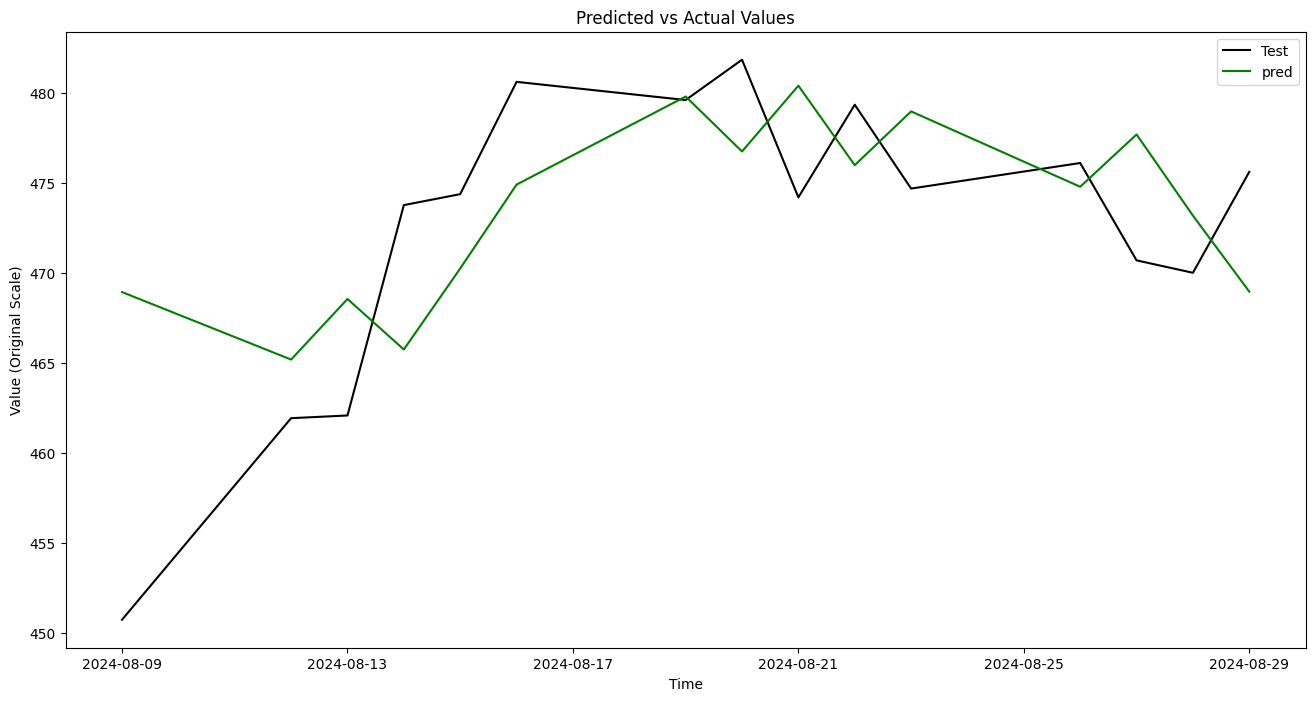

In [ ]:
#Model only predicts 1 day in advance (The NextTargetClose)
y_test_original = sc_y.inverse_transform(y_test)
y_pred_original = sc_y.inverse_transform(y_pred)

plt.figure(figsize=(16,8))
plt.plot(time_published_test, y_test_original, color = 'black', label = 'Test')
plt.plot(time_published_test, y_pred_original, color = 'green', label = 'pred')
plt.xlabel('Time')
plt.ylabel('Value (Original Scale)')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
# data_set_scaled = sc.fit_transform(data_set)
# print(data_set_scaled)
data_set = data_set.to_numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [ ]:
# multiple feature from data provided to the model
X = []
corresponding_times = []
backcandles = 30
print(data_set.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set.shape[0]):#backcandles+2
        X[j].append(data_set[i-backcandles:i, j])

for i in range(backcandles, data_set.shape[0]):  # Starting from backcandles to get the correct times
  # Append the time corresponding to the last time step of each sample
  corresponding_times.append(time_published[i])
corresponding_times = np.array(corresponding_times)


#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
X, yi =np.array(X), np.array(data_set[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
# print(X)
print(X.shape)
# print(y)
print(y.shape)

from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler(feature_range=(0, 1))
sc_y = MinMaxScaler(feature_range=(0, 1))

X_shape = X.shape
X_reshaped = X.reshape(-1, X.shape[2])

X_reshaped_scaled = sc_X.fit_transform(X_reshaped)
X = X_reshaped_scaled.reshape(X_shape[0], X_shape[1], -1)
y = sc_y.fit_transform(y)

101
(71, 30, 8)
(71, 1)


In [ ]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
time_published_train, time_published_test = corresponding_times[:splitlimit], corresponding_times[splitlimit:]
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)
print(sc_y.inverse_transform([y_test[-1]]), corresponding_times[-1])
# print(y_train)

56
(56, 30, 8) (15, 30, 8)
(56, 1) (15, 1)
[[475.60165405]] 2024-08-29


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np

np.random.seed(506)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

W0000 00:00:1733633466.139841   21112 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 277ms/step - loss: 0.1540 - val_loss: 0.4746
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step - loss: 0.0931 - val_loss: 0.1323
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.0345 - val_loss: 0.1006
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.0303 - val_loss: 0.1438
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 0.0255 - val_loss: 0.2034
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - loss: 0.0328 - val_loss: 0.1655
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.0263 - val_loss: 0.1048
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 0.0234 - val_loss: 0.0937
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.0226 - val_loss: 0.1206
Epoch 10/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.0207 - val_loss: 0.1399
Epoch 11/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0217 - val_loss: 0.1043
Epoch 12/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.0180 - val_loss: 0.0

In [ ]:
loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Mean Squared Error on test set: {loss}")
y_pred = model.predict(X_test)
for i in range(15):
    print(y_pred[i], y_test[i])

Mean Squared Error on test set: 0.026159388944506645
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 831ms/step
[0.2961489] [0.24358416]
[0.3051735] [0.40783081]
[0.3335646] [0.4100313]
[0.36590344] [0.58146385]
[0.4032907] [0.59040924]
[0.44708815] [0.68191806]
[0.4963808] [0.66710662]
[0.49952894] [0.69995586]
[0.49018624] [0.58776954]
[0.45920056] [0.66329362]
[0.44684237] [0.59495544]
[0.4411797] [0.61577948]
[0.44022015] [0.53644241]
[0.4138455] [0.52632371]
[0.40416753] [0.60859359]


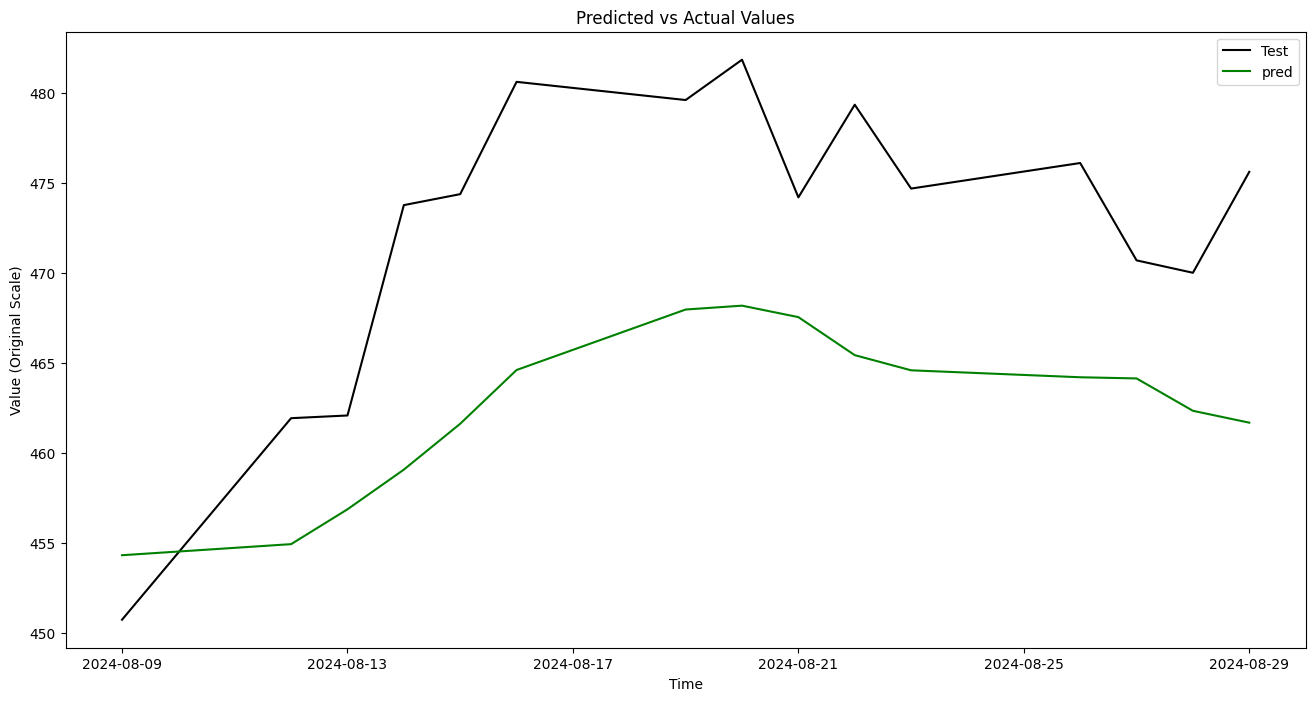

In [ ]:
#Model only predicts 1 day in advance (The NextTargetClose)
y_test_original = sc_y.inverse_transform(y_test)
y_pred_original = sc_y.inverse_transform(y_pred)

plt.figure(figsize=(16,8))
plt.plot(time_published_test, y_test_original, color = 'black', label = 'Test')
plt.plot(time_published_test, y_pred_original, color = 'green', label = 'pred')
plt.xlabel('Time')
plt.ylabel('Value (Original Scale)')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()